# Chapter four - Montecarlo sampling and the Reed-Frost model under intervention

We saw in the last chapter that the Reed-frost model is a powerful tool for understanding how an outbreak unfolds and the role of uncertainty in outbreak dynamics.
However, the Reed-Frost model is flexible.
We will see how can add timed interventions to this model. 
In addition, we will learn about a powerful tool called Monte carlo sampling that can be used to estimate difficult-to-compute probabilities.  

Lets look at how we can model public health interventions during the course of a pathogen to alter (hopefully reduce) the number of infectors over time. 

## Adding an intervention

Suppose we observe s,i,r from a Reed-frost model from 0 to T (which we will call the observational period). 

Furter, suppose that we decide to add an intervention at time $t^{*}$.
This intervention is such that it lower the probability of transmission $(p)$ by 50\%, and the intervention permanently lowers $p$ by 50\% from $t^{*}$ to the end of the observational period. 

Previously, we set initial conditions for s,i,r; a probability of transmission, and an observational period. The code below is copy/pasted from the previous chapter. 

In [95]:
#--initial conditions
s0 = 100
i0 = 1
r0 = 0

#--probability of transmission
p=0.015

#--create three lists and add the initial number of s,i,r to each list. 
s = [s0]
i = [i0]
r = [r0]

def pr_inf(p,i):
    return 1 - (1-p)**i

start = 0
end   = 32
step  = 1

for t in np.arange(start,end,step): #<--Whats this function doing? 
    #--simulate the number of infectors at time t+delta
    num_of_sus_at_time_t = s[-1] ## <- why? 
    num_of_inf_at_time_t = i[-1] ## <- why? 
    
    i__t_plusDelta = np.random.binomial( n=num_of_sus_at_time_t
                                        ,p=pr_inf(p,num_of_inf_at_time_t) )
        
    #--compute the number of susceptibles at time t+delta
    s__t_plusDelta = num_of_sus_at_time_t-i__t_plusDelta

    #--compute the number of removed at time t+delta
    r__t_plusDelta = r[-1] + num_of_inf_at_time_t

    #--add the results to our lists. 
    s.append(s__t_plusDelta)
    i.append(i__t_plusDelta)
    r.append(r__t_plusDelta)

To add in an intervention, we will change the probability of transmission $p$ from $p=0.015$ to p = $0.015*(1/2) = 0.0075$ at $t^{*}$. 

Lets assume that the intervention is started at time $t^{*}=10$. 

We can use an if/else statement to add in an intervention. 
As the above for loops cycles through times $t=0,1,2,3,4$ and so on, we will check that $t \ge 10$. When this condition is true we will set $p=0.015 \cdot (1/2)$ and otherwise set $p=0.015$. 


In [96]:
#--initial conditions
s0 = 100
i0 = 1
r0 = 0

#--probability of transmission
p                         = 0.02
reduction_by_intervention = 0.50                        #<--new line here
time_of_intervention      = 10                          #<--new line here
p_intervention            = p*reduction_by_intervention #<--new line here

#--create three lists and add the initial number of s,i,r to each list. 
s = [s0]
i = [i0]
r = [r0]

#--function for the probability of infection
def pr_inf(p,i):
    return 1 - (1-p)**i

#--observational period
start = 0
end   = 32
step  = 1

for t in np.arange(start,end,step): #<--Whats this function doing? 
    #--is t greater than t*? Is so then reduce p
    if t>=time_of_intervention:
        ptrans = p_intervention
    else:
        ptrans = p
    
    #--simulate the number of infectors at time t+delta
    num_of_sus_at_time_t = s[-1] ## <- why? 
    num_of_inf_at_time_t = i[-1] ## <- why? 
    
    i__t_plusDelta = np.random.binomial( n=num_of_sus_at_time_t
                                        ,p=pr_inf(ptrans,num_of_inf_at_time_t) )
        
    #--compute the number of susceptibles at time t+delta
    s__t_plusDelta = num_of_sus_at_time_t-i__t_plusDelta

    #--compute the number of removed at time t+delta
    r__t_plusDelta = r[-1] + num_of_inf_at_time_t

    #--add the results to our lists. 
    s.append(s__t_plusDelta)
    i.append(i__t_plusDelta)
    r.append(r__t_plusDelta)

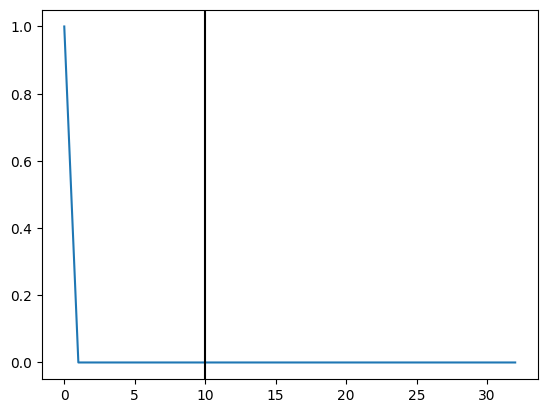

In [97]:
plt.plot(i)
plt.axvline(10,color="black")

## When should we initiate our intervention (Monte carlo sampling may help)?

Up until now, many probability computations were likely able to be computed "in closed form".
That is, there was a formula that took inputs (maybe data and parameters) and returned the probability that an event will be observed. 
Some events, however, do not have a closed form solution.
Instead, they need to be approximated. 
There are many methods for approximating the probabiliy of events. 
One that we will learn is Monte carlo sampling.

Let $E$ be an experiment (the set of all possible events) associated with the final epidemic size.
The final epidemic size is defined as the total number of infected individuals after the observational period ends. 
That is, for observational period $t \in [\text{start},\text{stop}]$, this experiment generates possible values $0,1,2,3,4,5,6,\cdots N$.  

Then, we can think of the above model as an experiment that produces final epidemic sizes (i.e. events). 
If we wanted to approximate the probability that from the above model we observe a final epidemic size $e^{*}$ then we can run the above model $N$ times and compute the proportion of times we observe a final epidemic size of $e^{*}$.

Monte carlo sampling approximates the probability of an event $P(E)$ by sampling a finite number of times from the experiment $A = [e_{1},e_{2},\cdots,e_{n}]$ and computing 
$$
    P(E) \approx \frac{ N(A \in E)  }{n}
$$
where $N(A \in E)$ is the number of times items in the set $A$ appear in the event $E$. 


Lets simulate our original Reed-Frost model (without an intervention) 2000 times and store the final epidemic sizes in the list `RF_original_epidemic_size`.
Next, we'll simulate our intervention model and store the final epidemic sizes in the list `RF_intervention_epidemic_size`. 
Then we can compare the performance of our intervention.

We will add to our original model, a list called `RF_original_epidemic_size` and append to this loop the final epidemic size. 

### Final epidemic size for Original Reed Frost model

In [98]:
#--initial conditions
s0 = 100
i0 = 1
r0 = 0

#--probability of transmission
p=0.015
def pr_inf(p,i):
    return 1 - (1-p)**i

start = 0
end   = 32
step  = 1

SIMS = 2000 #<- Number of simulations to run. 
RF_original_epidemic_size = []

for sim in range(SIMS): #<-What does range do? 
    #--create three lists and add the initial number of s,i,r to each list. 
    s = [s0]
    i = [i0]
    r = [r0]
    
    for t in np.arange(start,end,step): #<--Whats this function doing? 
        #--simulate the number of infectors at time t+delta
        num_of_sus_at_time_t = s[-1] ## <- why? 
        num_of_inf_at_time_t = i[-1] ## <- why? 
        
        i__t_plusDelta = np.random.binomial( n=num_of_sus_at_time_t
                                            ,p=pr_inf(p,num_of_inf_at_time_t) )
            
        #--compute the number of susceptibles at time t+delta
        s__t_plusDelta = num_of_sus_at_time_t-i__t_plusDelta
    
        #--compute the number of removed at time t+delta
        r__t_plusDelta = r[-1] + num_of_inf_at_time_t
    
        #--add the results to our lists. 
        s.append(s__t_plusDelta)
        i.append(i__t_plusDelta)
        r.append(r__t_plusDelta)
    #--Model is done running for the observational period. 
    #--Now we can record the final epidemic size for this run
    RF_original_epidemic_size.append( r[-1] ) #<-um, why is it r[-1]?

Now we have all the final epidemic sizes stored in `RF_original_epidemic_size`.
Lets look at the (appeoximate) probability distribution of the final epidemic size. 

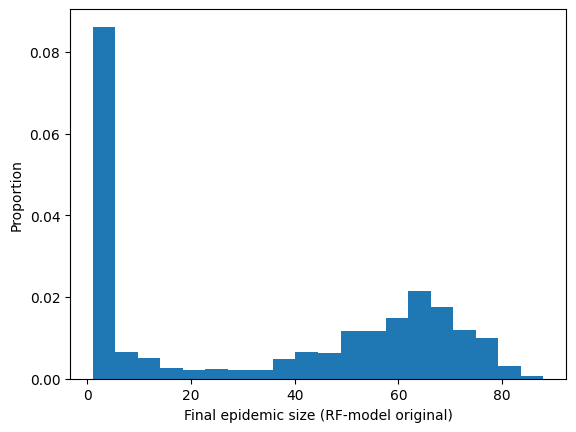

In [99]:
plt.hist(RF_original_epidemic_size,20,density=True)
plt.ylabel("Proportion")
plt.xlabel("Final epidemic size (RF-model original)")
plt.show()

In [102]:
#--initial conditions
s0 = 100
i0 = 1
r0 = 0

#--probability of transmission
p=0.015

def pr_inf(p,i):
    return 1 - (1-p)**i

#--probability of transmission
p                         = 0.015
reduction_by_intervention = 0.50                        #<--new line here
time_of_intervention      = 10                          #<--new line here
p_intervention            = p*reduction_by_intervention #<--new line here

start = 0
end   = 32
step  = 1

SIMS = 5000 #<- Number of simulations to run. 
RF_intervention_epidemic_size = []

for sim in range(SIMS): #<-What does range do? 

    #--create three lists and add the initial number of s,i,r to each list. 
    s = [s0]
    i = [i0]
    r = [r0]
    
    for t in np.arange(start,end,step): #<--Whats this function doing? 
        #--is t greater than t*? Is so then reduce p
        if t>=time_of_intervention:
            ptrans = p_intervention
        else:
            ptrans = p
        
        #--simulate the number of infectors at time t+delta
        num_of_sus_at_time_t = s[-1] ## <- why? 
        num_of_inf_at_time_t = i[-1] ## <- why? 
        
        i__t_plusDelta = np.random.binomial( n=num_of_sus_at_time_t
                                            ,p=pr_inf(ptrans,num_of_inf_at_time_t) )
                        
        #--compute the number of susceptibles at time t+delta
        s__t_plusDelta = num_of_sus_at_time_t-i__t_plusDelta
    
        #--compute the number of removed at time t+delta
        r__t_plusDelta = r[-1] + num_of_inf_at_time_t
    
        #--add the results to our lists. 
        s.append(s__t_plusDelta)
        i.append(i__t_plusDelta)
        r.append(r__t_plusDelta)
    #--Model is done running for the observational period. 
    #--Now we can record the final epidemic size for this run
    RF_intervention_epidemic_size.append( r[-1] ) #<-umm, why is it r[-1]? 

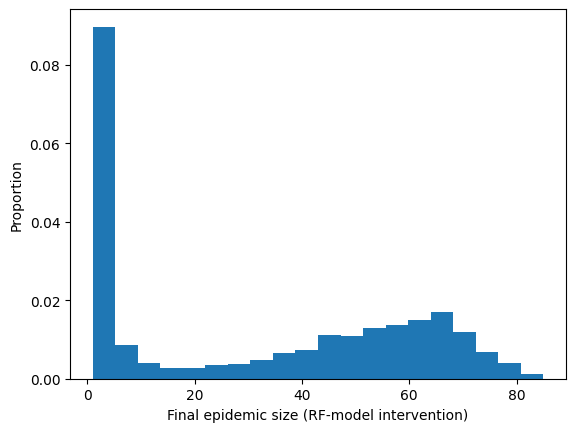

In [103]:
plt.hist(RF_intervention_epidemic_size,20,density=True)
plt.ylabel("Proportion")
plt.xlabel("Final epidemic size (RF-model intervention)")
plt.show()

Lets compare the two plots. 
To do this, we will ask to plot a histogram for both the final size of the original model and the final size of the intervention model *over the same bins*.


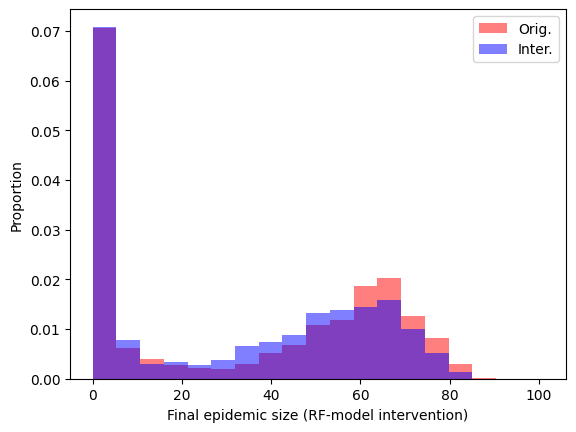

In [113]:
bins = np.linspace(0,101,20)

fig,ax = plt.subplots()
ax.hist(RF_original_epidemic_size,bins     ,color="red" , density=True, alpha=0.50,label="Orig.")
ax.hist(RF_intervention_epidemic_size,bins ,color="blue", density=True, alpha=0.50,label="Inter.")
plt.ylabel("Proportion")
plt.xlabel("Final epidemic size (RF-model intervention)")
plt.legend()
plt.show()

# Homework

1. Package the intervention model code into a single function.
   1. The function will take as inputs: `s0`,`i0`,`r0`, `p`, `start`, `stop`, `step`, `reduction_by_intervention`, `time_of_intervention`. The output will be the lists `s`,`i`,`r`.
2. For the model in (1) with the parameters above:
   1. Run the model 100 times and plot each time the number of infectors for `reduction_by_intervention` = 1.
   2. Run the model 100 times and plot each time the number of infectors for `reduction_by_intervention` = 0.40
   3. Describe the differences in the observations and why. What is the model with `reduction_by_intervention` = 1?
3. Create a function called `RF_sim` that takes the same parameters as the function that you created in (1) plus a parameter called `SIMS`. This new parameter will define the number of times to run the RF model. This new function will do the following:
   1. Run the RF function in (1) SIMS times.
   2. Record the time at which the number of infectors is highest. This is called "peak intensity".
   3. The function returns a tuple: (1) a list of all final epidemic sizes and (2) a list of all peak intensities.   
4. Use the function that you created in (3) to decide on the optimal time to launch an intervention. Justify your response (briefly). 